In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT NECCESSARY PACKAGES**

In [4]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(7).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.236, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-7 in yolov8:: 100%|██████████| 7460/7460 [00:01<00:00, 6360.08it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 277MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-7 datasets/sixray100-1

# **TRAIN MODEL**

In [8]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=100, imgsz=640, batch=16, project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
2024-01-07 08:21:17,454	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-07 08:21:18,427	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 62.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels... 2841 images, 4 backgrounds, 0 corrupt: 100%|██████████| 2841/2841 [00:02<00:00, 1205.25it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 7064. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<00:00, 1330.96it/s]

val: New cache created: /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.8G      1.227      1.816      1.444         32        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.68it/s]

                   all        587       1503      0.651      0.287      0.282      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.2G      1.346      1.585      1.568         22        640: 100%|██████████| 178/178 [02:10<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        587       1503      0.845       0.25      0.324      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.2G      1.364      1.585      1.593         21        640: 100%|██████████| 178/178 [02:09<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        587       1503      0.713      0.365      0.381      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.2G      1.292      1.461      1.546         28        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.752       0.36      0.412       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.2G      1.249      1.377      1.516         31        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        587       1503      0.826      0.391      0.485      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.2G      1.215      1.273      1.503         44        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]


                   all        587       1503      0.815      0.389      0.449      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.1G      1.171      1.216      1.462         47        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        587       1503      0.814      0.431       0.51      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.2G      1.137      1.169      1.424         38        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.824      0.476      0.538      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.2G      1.098      1.116      1.395         49        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.875      0.446      0.542      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.2G      1.079      1.061      1.385         55        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.874      0.463      0.551      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.1G      1.066      1.031      1.386         32        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.894      0.471      0.545      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.2G      1.043      1.018      1.374         42        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.849      0.521      0.677        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.1G      1.029     0.9641       1.36         57        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.888      0.505      0.581       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.2G      1.004     0.9413      1.344         32        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.809      0.552      0.607      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.1G      1.007     0.9276      1.336         50        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        587       1503      0.916      0.538      0.645      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.2G     0.9789     0.8915      1.314         42        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.871      0.568      0.636      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.1G      0.964     0.8604      1.297         36        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.797       0.61      0.647      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.2G     0.9663     0.8647      1.306         38        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.768      0.605      0.632      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.1G     0.9544     0.8563      1.295         34        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.831      0.605      0.653      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G     0.9357     0.8221      1.281         28        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503       0.79      0.608      0.737      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.1G     0.9359     0.8142      1.285         44        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503       0.87      0.604      0.675      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.2G     0.9354     0.8041      1.276         26        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.842      0.618      0.658      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.1G     0.9151     0.7915      1.263         43        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.849      0.643      0.685      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.2G     0.9195     0.7912      1.263         53        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.678      0.642      0.679       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.1G     0.9034     0.7572      1.255         37        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.702      0.654      0.702      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.2G     0.8919     0.7262      1.236         74        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.844      0.625      0.668      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.1G     0.8759     0.7258      1.235         47        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.861      0.642      0.704      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G     0.8699     0.7105      1.227         32        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.702       0.62      0.685      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.1G     0.8685     0.7196      1.228         52        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.872      0.642      0.701      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.2G     0.8621     0.7076      1.216         37        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.649      0.666      0.702      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.2G     0.8432     0.6698      1.207         54        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.696      0.679      0.713      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.2G     0.8453     0.6816      1.212         39        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.822      0.652      0.681      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.1G      0.852     0.6749      1.214         43        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]


                   all        587       1503      0.708       0.69       0.73      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.2G     0.8357     0.6709      1.204         47        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.675      0.814      0.839      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.1G     0.8336     0.6633      1.202         40        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


                   all        587       1503      0.876      0.691      0.733      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.2G     0.8253     0.6484      1.191         46        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.826      0.711       0.79      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.1G     0.8199     0.6454      1.192         53        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.649      0.808        0.8      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.1G     0.8125     0.6324      1.189         65        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.655      0.789      0.756      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.1G     0.8013     0.6165       1.18         38        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.708      0.697      0.767      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.2G     0.8071     0.6286      1.188         38        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.829      0.706       0.74      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.1G     0.7989     0.6085       1.17         58        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.817      0.803      0.859      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G     0.7973     0.6157      1.183         42        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.721      0.777      0.758      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.1G     0.7933     0.6067      1.179         30        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.873      0.781      0.825      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.2G     0.7798     0.5994      1.169         29        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        587       1503      0.933      0.676      0.762      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.1G     0.7719     0.5944      1.155         24        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.902      0.703      0.757      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.2G      0.774     0.5831       1.16         35        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        587       1503      0.812      0.792      0.828      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.1G     0.7651     0.5811      1.159         35        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.917      0.704      0.773      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.2G     0.7699     0.5778       1.16         45        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.923      0.689      0.797       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.1G     0.7613     0.5722       1.15         43        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.771      0.788      0.758      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.2G     0.7529     0.5581      1.146         38        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503        0.9      0.719      0.791      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.1G     0.7501     0.5568      1.142         60        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.694      0.921      0.914      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.2G     0.7505     0.5569      1.148         30        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.876      0.765       0.84      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.1G      0.737     0.5505      1.141         57        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.777       0.86      0.825      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.2G     0.7384     0.5413      1.134         34        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.858      0.828      0.866       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.1G     0.7285     0.5313      1.129         50        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503        0.8      0.796      0.818      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.2G     0.7249     0.5301      1.132         31        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.847       0.78      0.846      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.1G     0.7225     0.5214      1.119         37        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.887      0.802      0.856      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.2G     0.7224     0.5227      1.129         49        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.931      0.694      0.774      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.1G     0.7123     0.5138      1.118         27        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.937      0.788      0.845        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.2G     0.7008     0.5131      1.105         46        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503       0.78      0.823      0.817      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.1G     0.6971     0.5073      1.114         35        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.896      0.739      0.846      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.2G     0.7073     0.5032      1.113         46        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.752      0.823      0.812      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.1G     0.6919     0.4941      1.103         26        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.885      0.792      0.825      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G     0.6951     0.4905      1.108         58        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.871      0.796      0.848      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.1G     0.6852     0.4771      1.099         57        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.887      0.819      0.862      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.2G     0.6858     0.4906      1.103         40        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.829      0.787      0.834      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.1G      0.672     0.4802      1.097         39        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503        0.9      0.818      0.835      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.2G     0.6708     0.4776      1.089         51        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.914      0.792      0.843      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.1G      0.666     0.4775       1.09         39        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        587       1503      0.863      0.822      0.829      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.2G     0.6634      0.466      1.087         37        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.894      0.809      0.843      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.1G     0.6665      0.471       1.09         40        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.765      0.834      0.825       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.2G     0.6608     0.4636      1.086         48        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.737      0.837      0.785      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.1G     0.6569     0.4616      1.084         58        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.913      0.721       0.74      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.2G     0.6516       0.46      1.083         44        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.898      0.801      0.835      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.1G     0.6437     0.4546      1.076         28        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.913      0.806      0.865      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.2G     0.6386     0.4474       1.07         52        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.912      0.813      0.844      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.1G     0.6318     0.4468      1.063         43        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.914      0.801      0.848      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.2G     0.6357      0.444      1.071         39        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.911      0.795      0.844      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.1G     0.6264       0.44      1.061         31        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.895      0.826      0.835      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G     0.6298     0.4352      1.067         31        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.836      0.831       0.84      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.1G     0.6229     0.4305      1.064         53        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.795      0.828       0.83      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.2G     0.6208     0.4318      1.062         57        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.728      0.835      0.789      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.1G     0.6136     0.4231      1.055         45        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.829      0.832      0.853      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.2G     0.6132     0.4245      1.057         40        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.907      0.726      0.781       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.1G     0.6017     0.4198      1.051         68        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.716       0.84      0.783      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G     0.5919     0.4096      1.043         53        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.908       0.74      0.778      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.1G     0.5983     0.4139      1.044         49        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.811      0.838      0.847      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.2G     0.5922     0.4101      1.039         54        640: 100%|██████████| 178/178 [02:09<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.933      0.729      0.797      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.1G     0.5968     0.4122       1.05         51        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.01it/s]

                   all        587       1503      0.934      0.725      0.858       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.2G     0.5955     0.4057      1.044         33        640: 100%|██████████| 178/178 [02:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.97it/s]

                   all        587       1503      0.727      0.824      0.808      0.676


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.1G     0.4979     0.2826     0.9875         26        640: 100%|██████████| 178/178 [02:10<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.793      0.904       0.86      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G     0.4915     0.2781     0.9833         23        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.748      0.844      0.858      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.1G      0.485      0.275     0.9776         19        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.777      0.878      0.862      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.1G      0.479     0.2735      0.978         22        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.99it/s]

                   all        587       1503      0.764      0.827      0.814      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.1G     0.4708     0.2664     0.9697         26        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.778      0.826      0.822      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.2G     0.4664     0.2661     0.9702         15        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.806      0.828      0.863      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.1G     0.4645     0.2654     0.9589         24        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.898      0.827      0.856      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.2G     0.4582     0.2618     0.9595         23        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.761      0.833      0.823      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.1G     0.4546     0.2606     0.9498         31        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  2.00it/s]

                   all        587       1503      0.921      0.808      0.867      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.2G     0.4547     0.2624     0.9548         26        640: 100%|██████████| 178/178 [02:08<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:09<00:00,  1.98it/s]

                   all        587       1503      0.919      0.808      0.868      0.738



100 epochs completed in 3.917 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 87.6MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 87.6MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:11<00:00,  1.59it/s]


                   all        587       1503      0.695      0.921      0.914      0.744
                   Gun        587        739       0.92      0.988       0.99      0.829
                Hammer        587          2      0.648          1      0.995      0.895
                 Knife        587        429      0.737      0.923      0.934      0.698
                Pliers        587        118      0.751      0.966      0.969      0.771
              Scissors        587         24      0.353       0.75      0.684      0.528
                Wrench        587        191      0.758      0.901      0.911      0.744
Speed: 0.4ms preprocess, 12.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784e3b28df90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# **VALIDATION MODEL**

In [9]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/weapon_detection-7/valid/labels.cache... 587 images, 0 backgrounds, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1503. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:21<00:00,  1.70it/s]


                   all        587       1503      0.921      0.712      0.885      0.718
                   Gun        587        739      0.965      0.978       0.99      0.831
                Hammer        587          2          1          0      0.828      0.745
                 Knife        587        429      0.927      0.872      0.934      0.699
                Pliers        587        118      0.956      0.915       0.97       0.77
              Scissors        587         24       0.76      0.661      0.676      0.522
                Wrench        587        191      0.915      0.848      0.911      0.742
Speed: 0.4ms preprocess, 31.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


array([    0.83145,      0.7455,     0.69866,     0.77006,     0.52201,     0.74186])

# **TESTING MODEL**


image 1/296 /kaggle/working/weapon_detection-7/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Scissors, 1 Wrench, 93.9ms
image 2/296 /kaggle/working/weapon_detection-7/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 46.4ms
image 3/296 /kaggle/working/weapon_detection-7/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 90.2ms
image 4/296 /kaggle/working/weapon_detection-7/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 1 Scissors, 35.9ms
image 5/296 /kaggle/working/weapon_detection-7/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 35.9ms
image 6/296 /kaggle/working/weapon_detection-7/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 36.0ms
image 7/296 /kaggle/working/weapon_detection-7/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 36.0ms
image 8/2

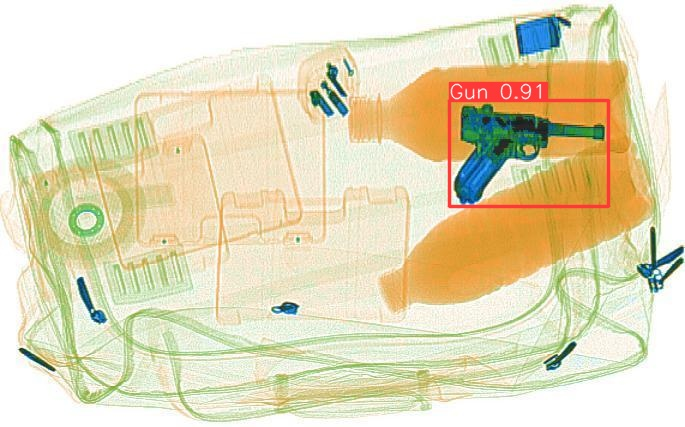

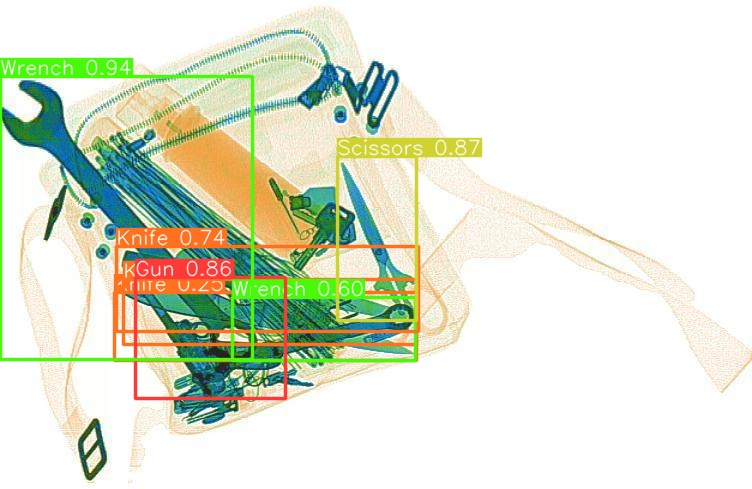

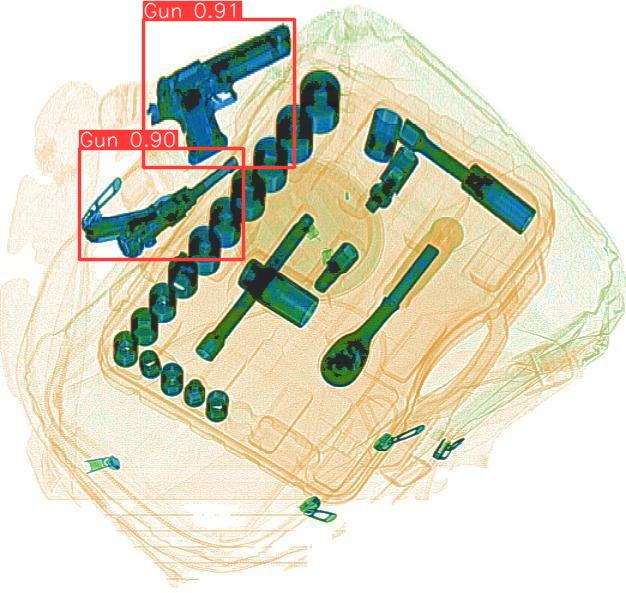

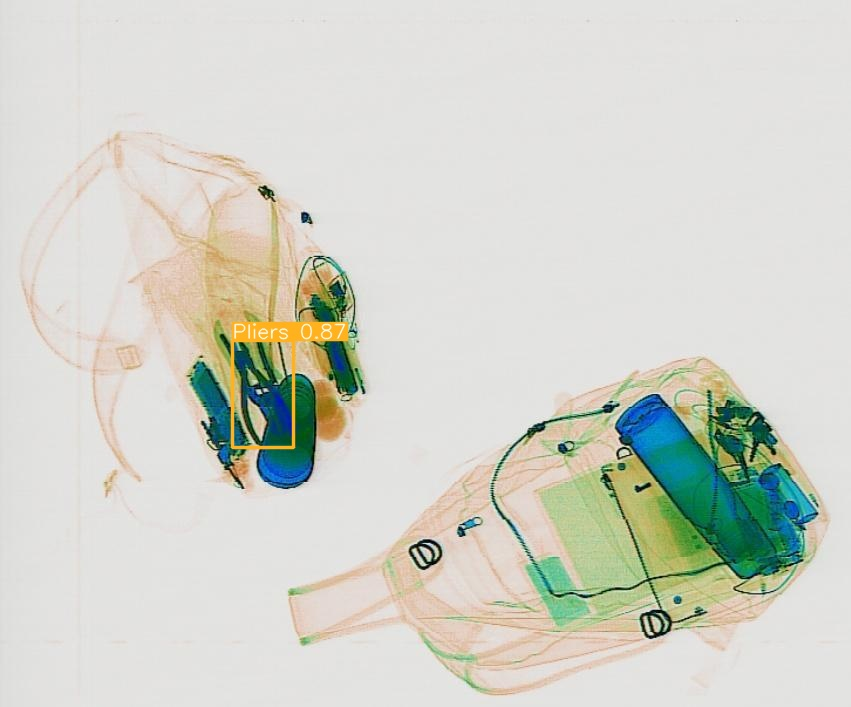

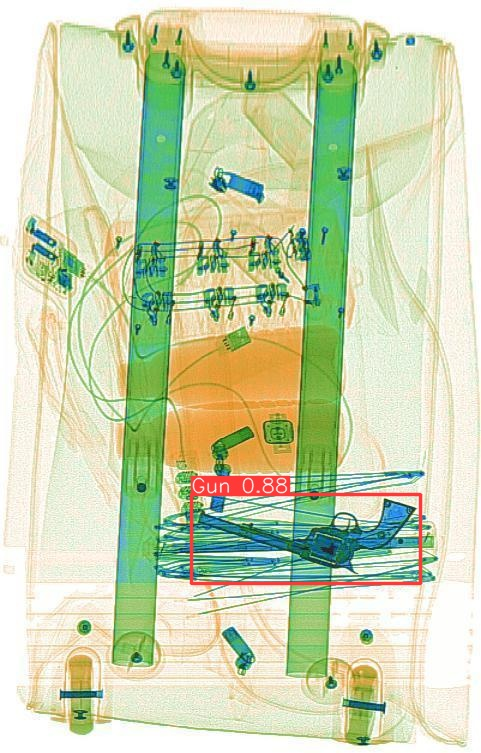

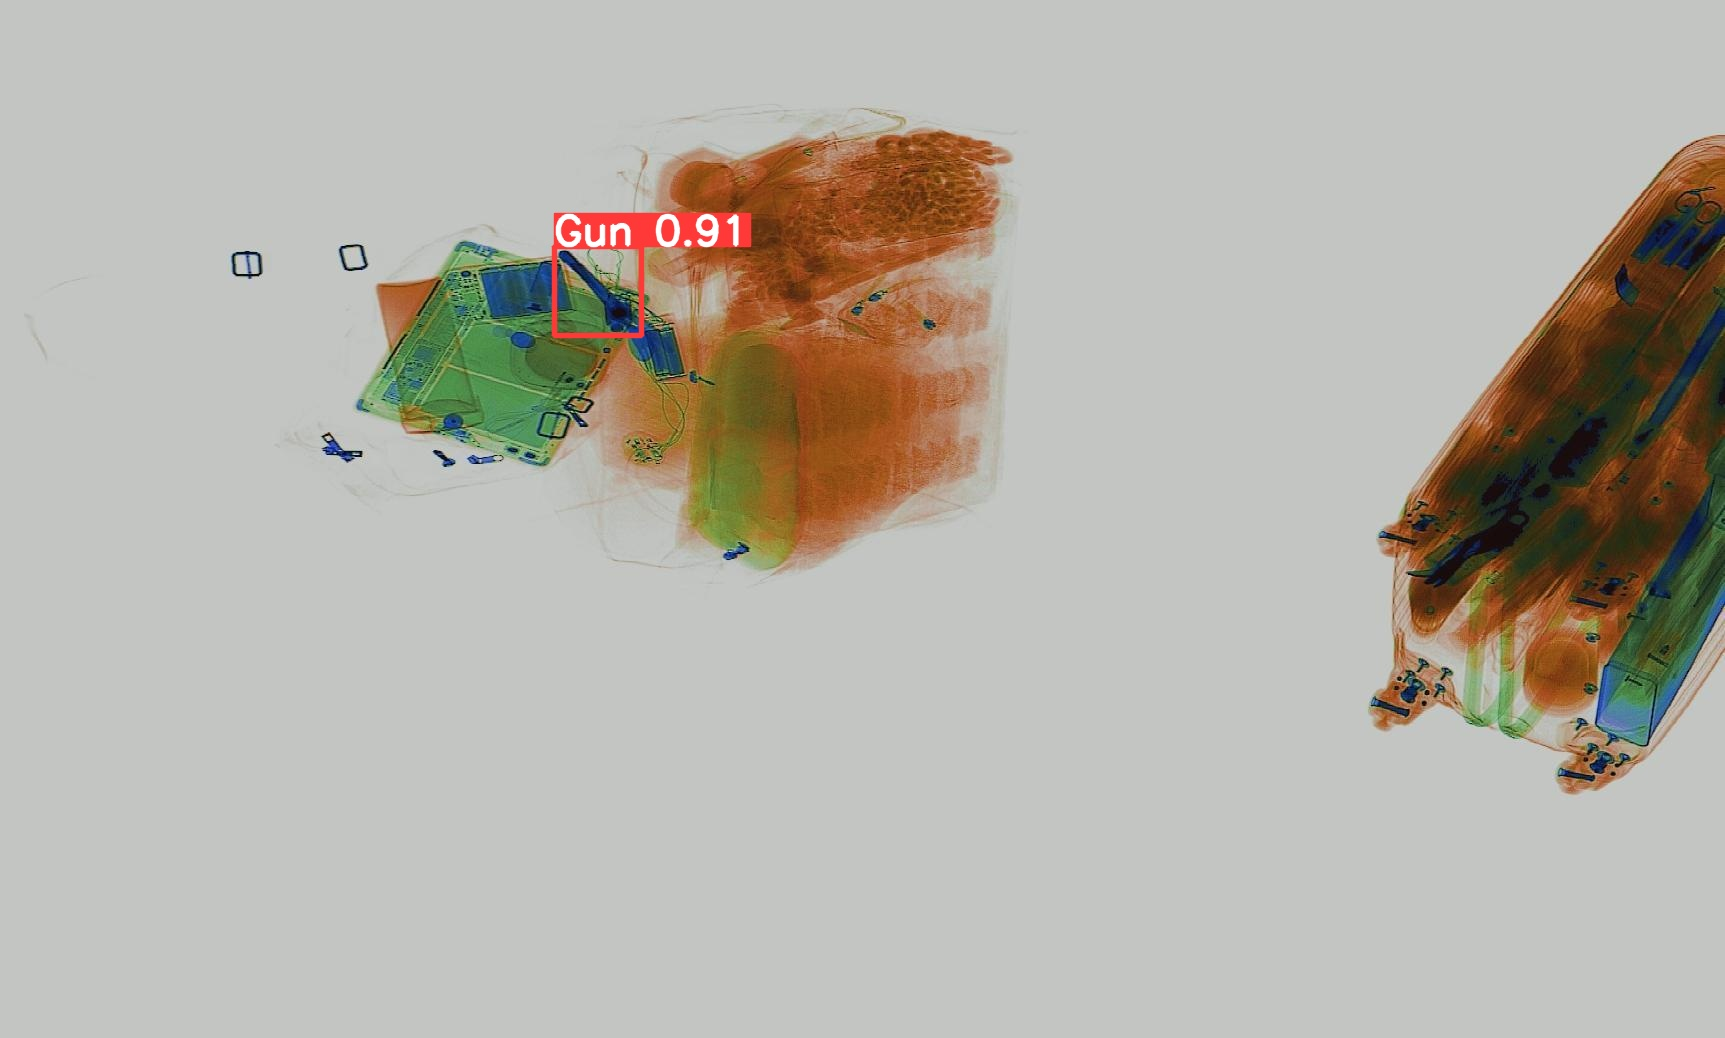

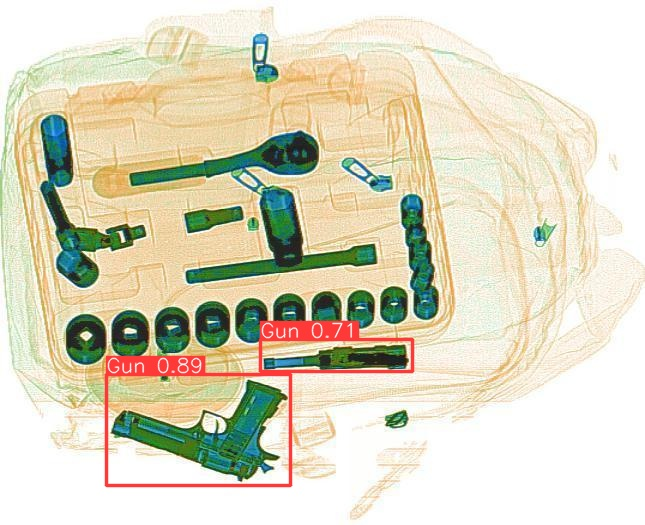

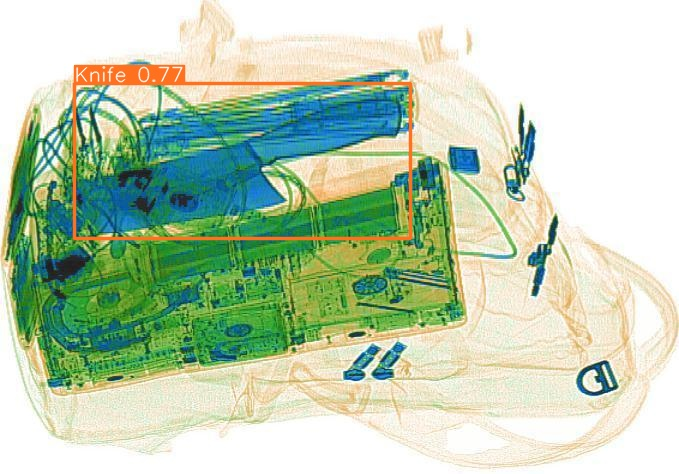

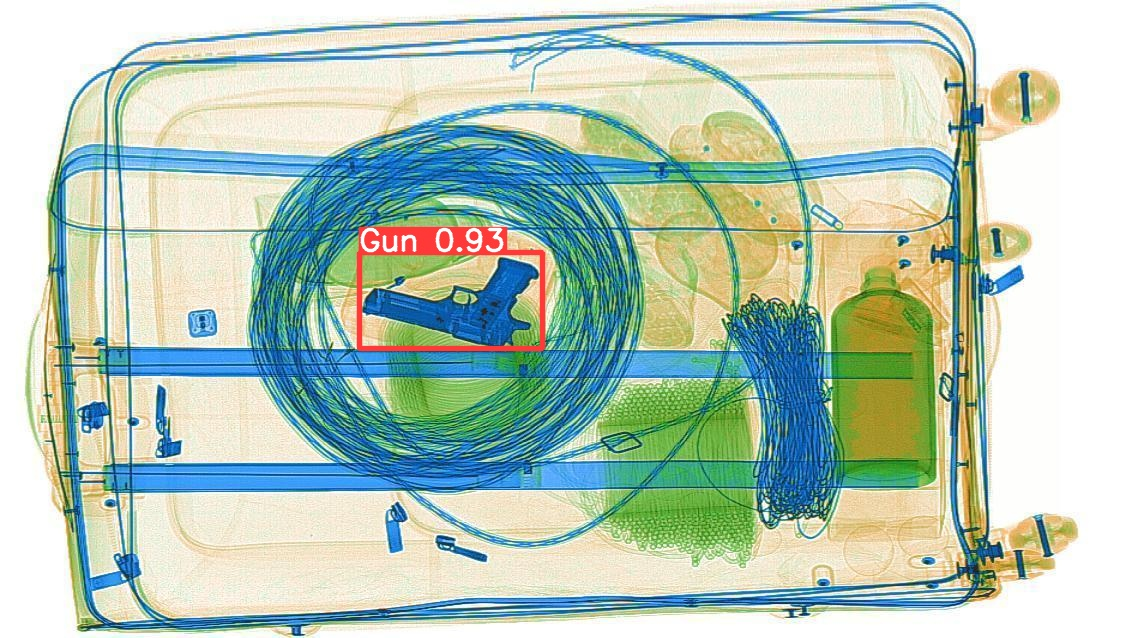

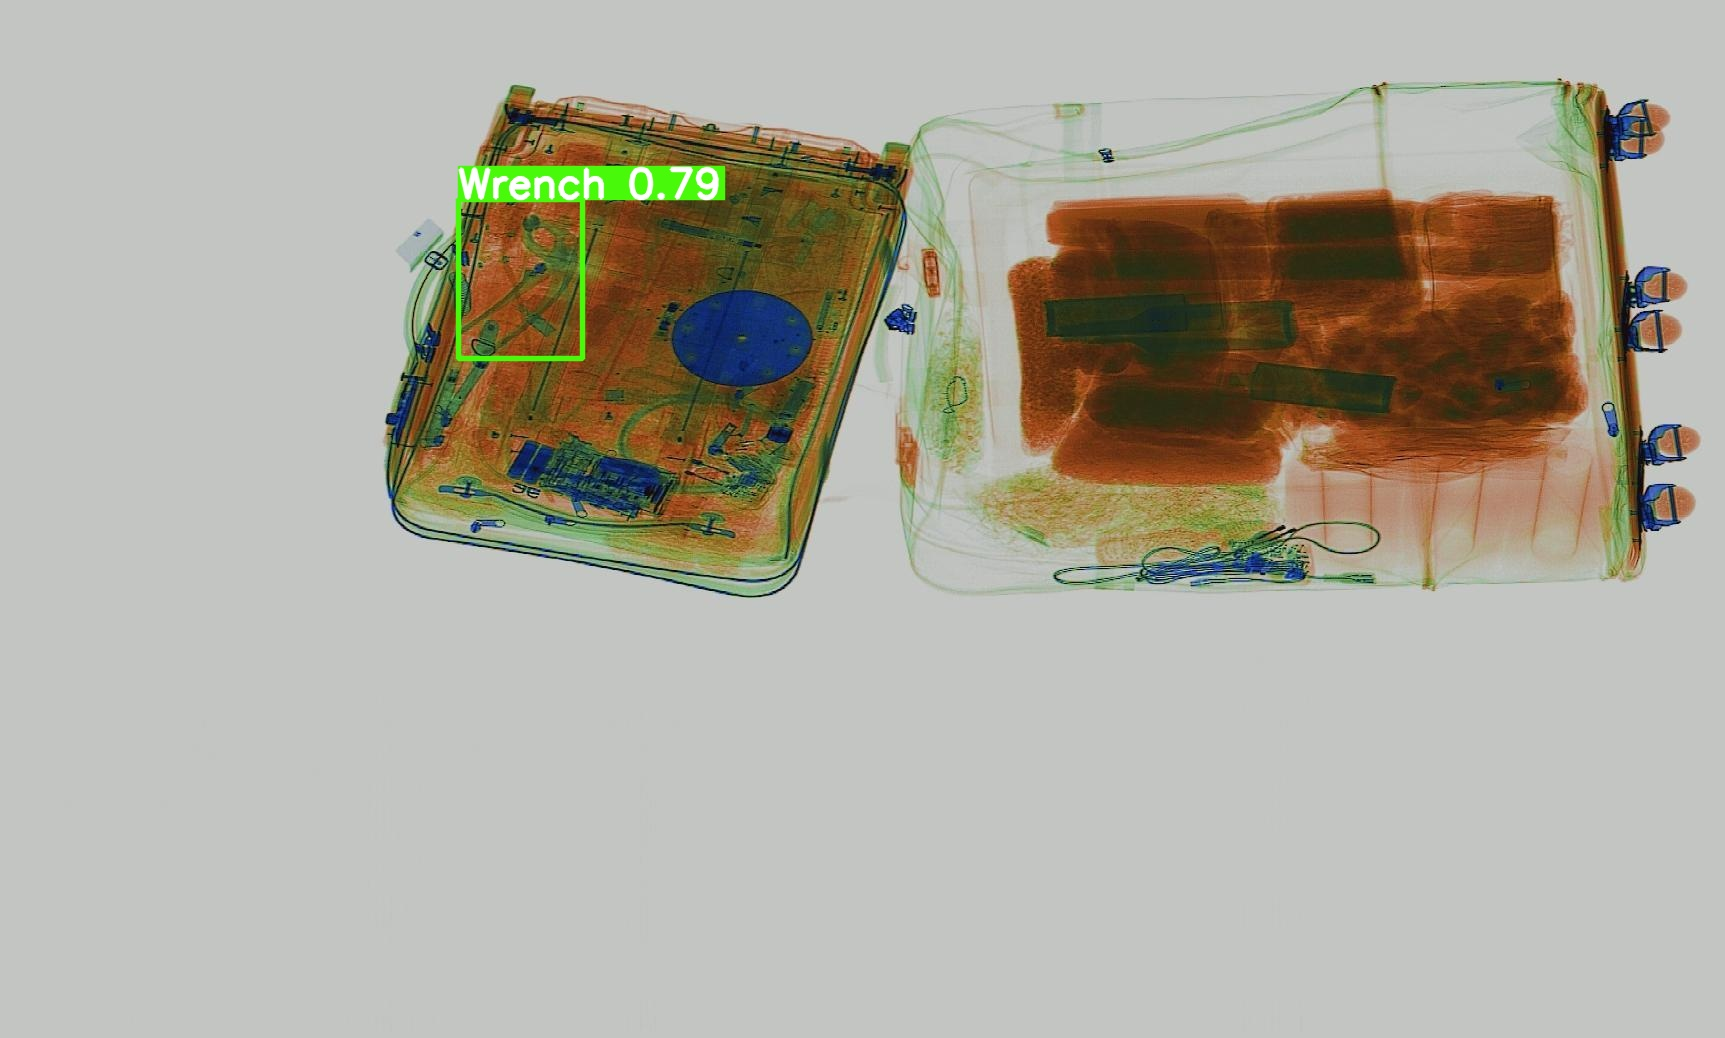

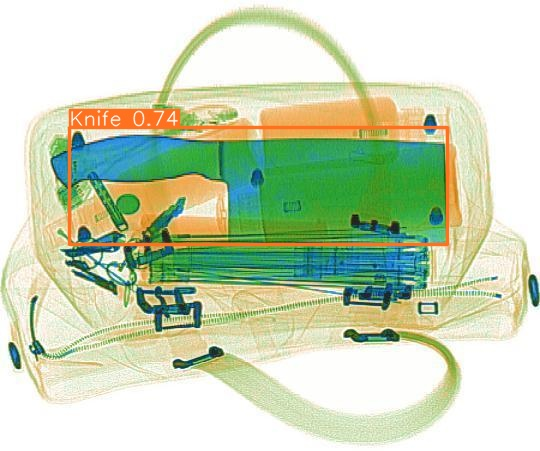

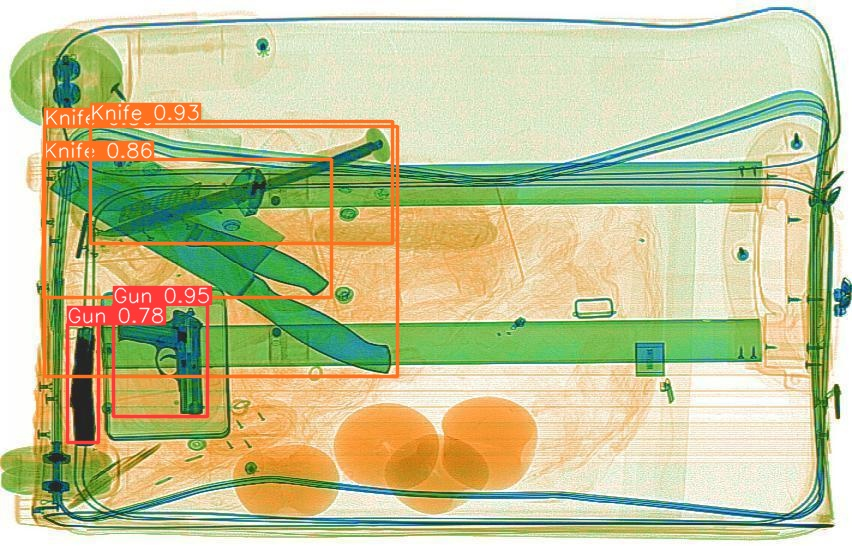

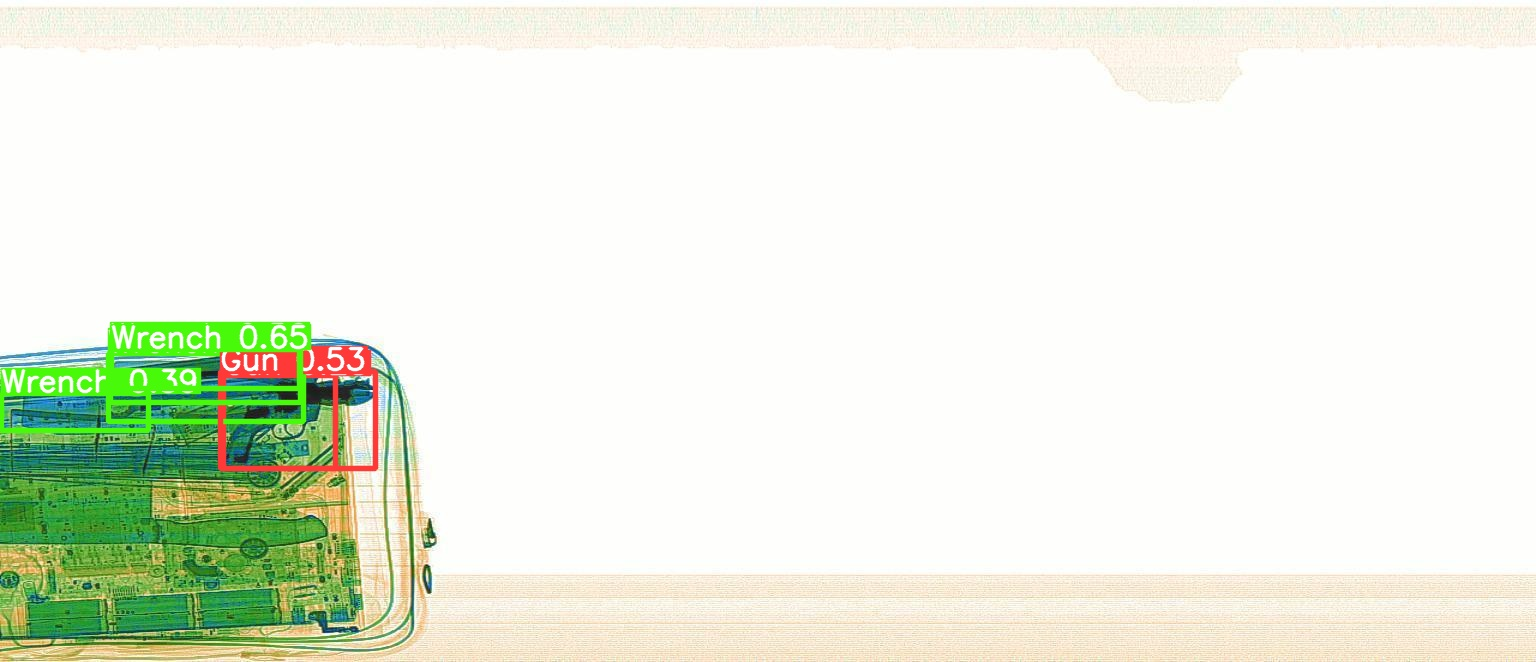

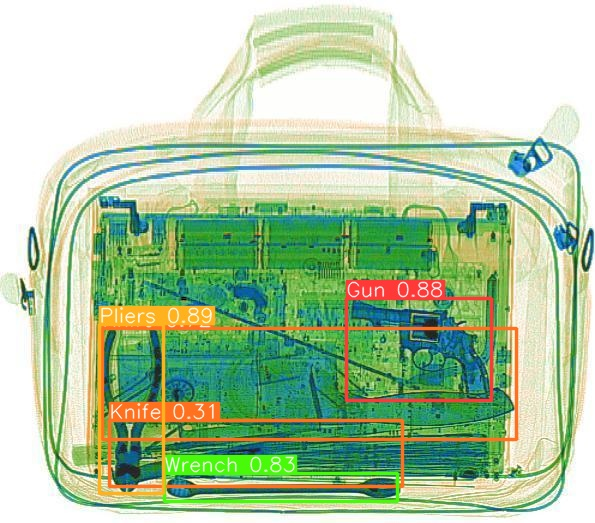

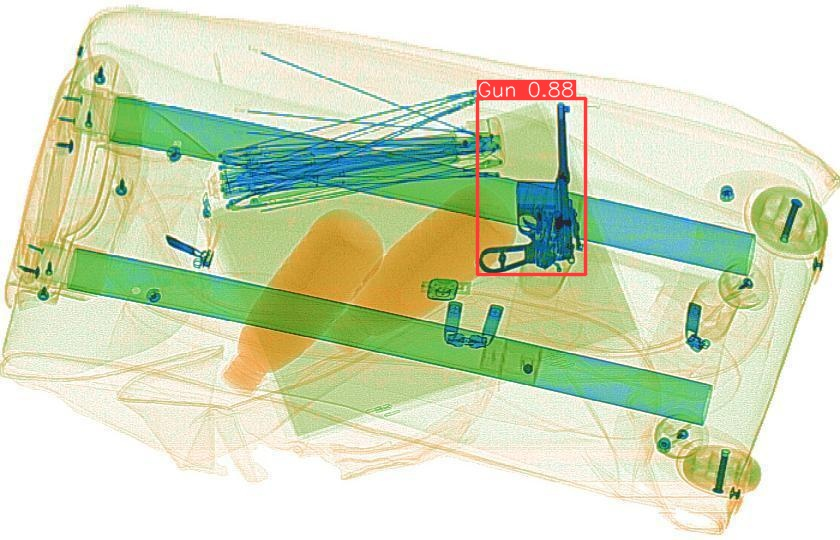

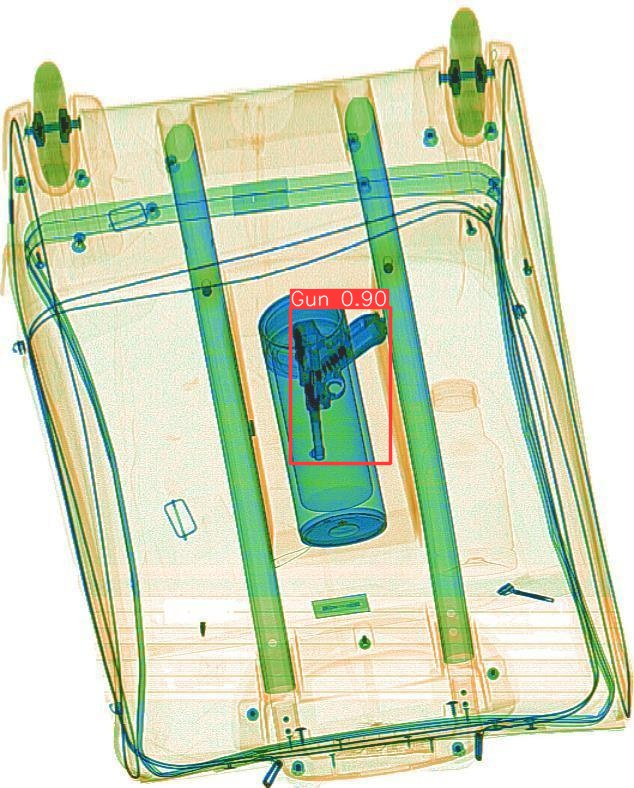

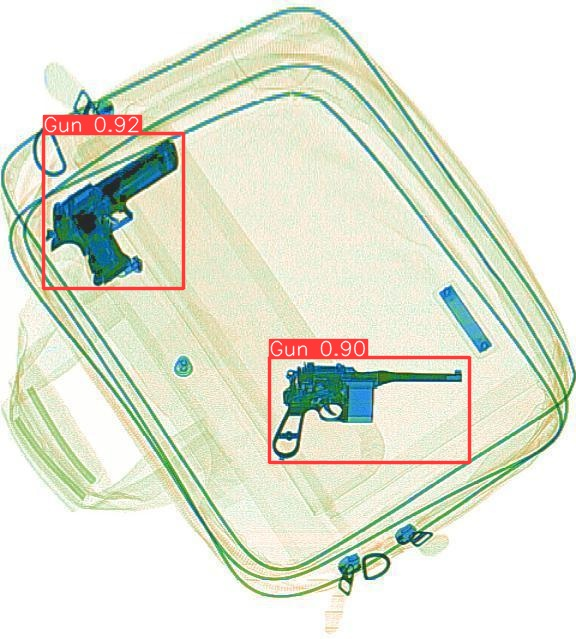

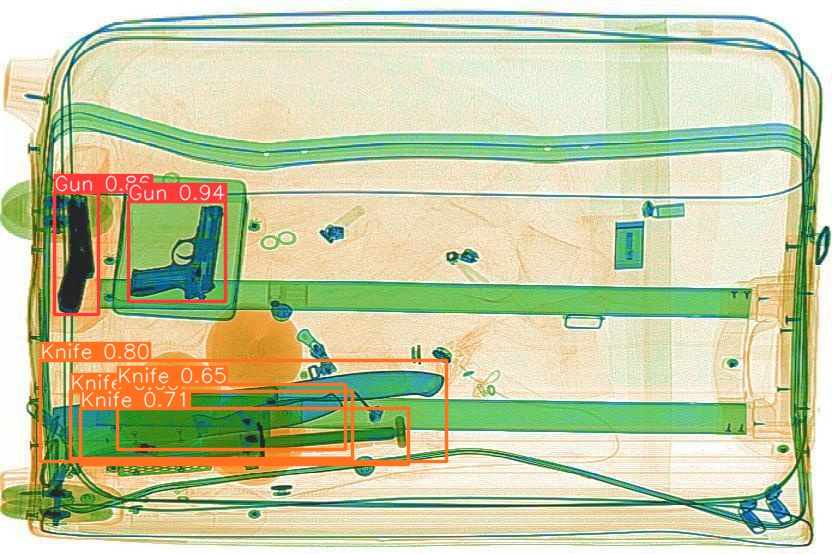

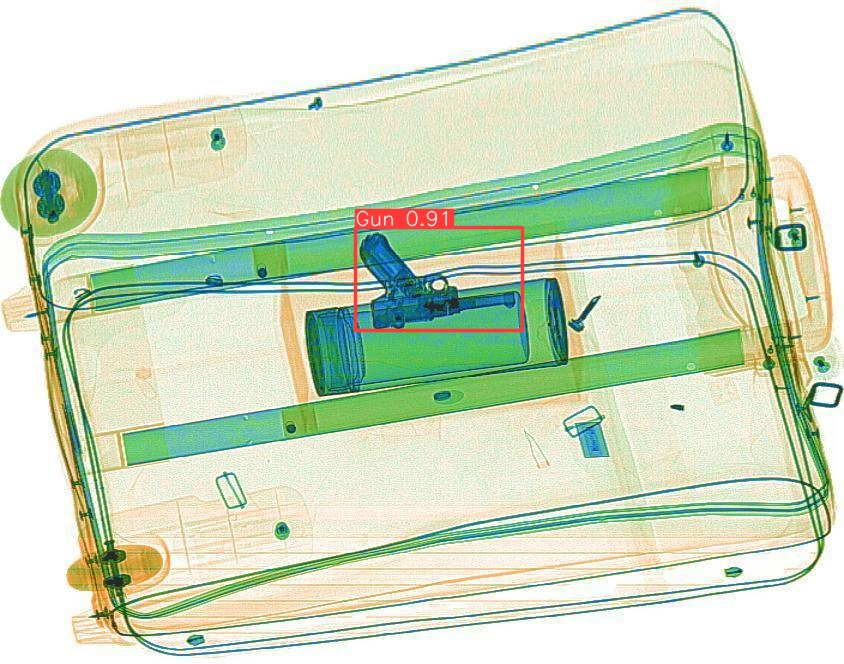

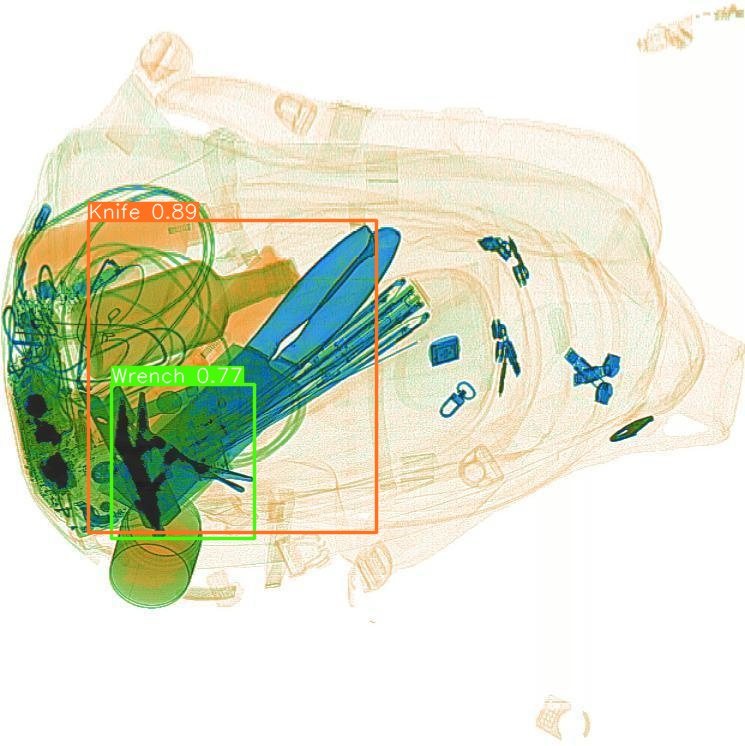

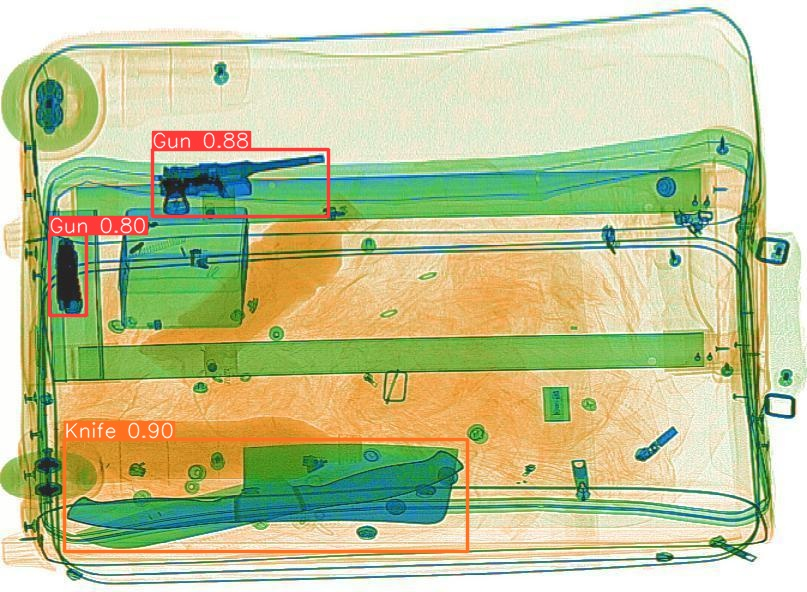

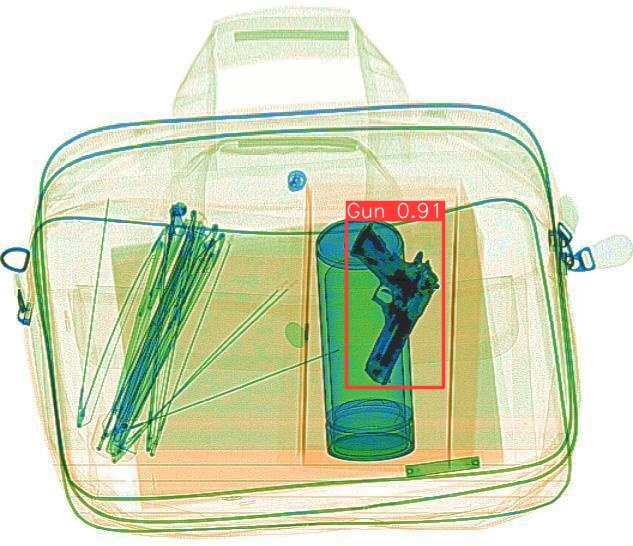

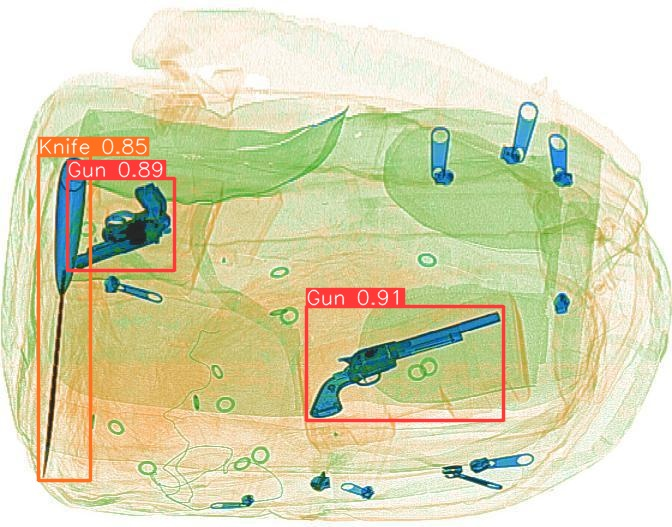

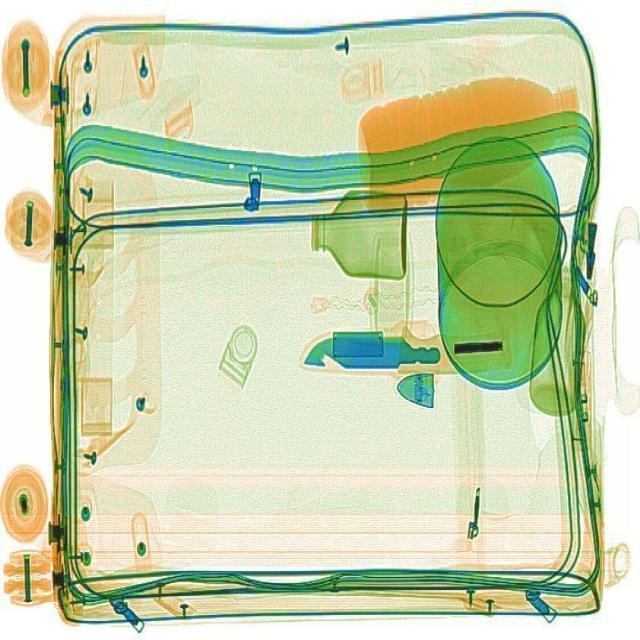

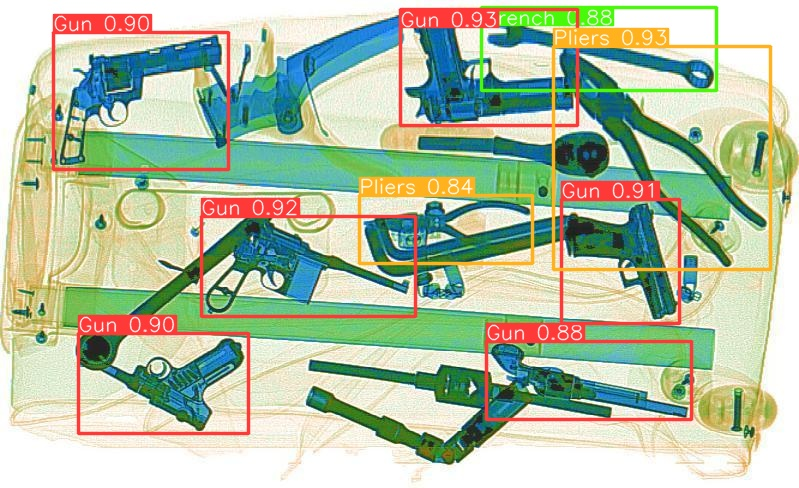

In [10]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-7/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [11]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5314.1/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (1333.45s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅       83.6               0.7421                   38.05
1             TorchScript       ✅      167.0               0.7192                   39.10
2                    ONNX       ✅      166.6               0.7192                   43.11
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎      229.1                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      416.6               0.7192                   53.62
7     TensorFlow GraphDef       ✅      166.7               0.7192                   59.49
8         TensorFlow 

Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅       83.6               0.7421                   38.05
1             TorchScript       ✅      167.0               0.7192                   39.10
2                    ONNX       ✅      166.6               0.7192                   43.11
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎      229.1                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      416.6               0.7192                   53.62
7     TensorFlow GraphDef       ✅      166.7               0.7192                   59.49
8         TensorFlow Lite       ❌        0.0                  NaN                     NaN
9     TensorFlow Edge TPU       ❌        0.0                  NaN                     NaN
10          TensorFlow.js       ❌        0.0                  NaN                     NaN
11           PaddlePaddle       ✅      333.2               0.7192                 1182.05
12                   ncnn       ❌        0.0                  NaN                     NaN